# Data exploration on tweets about Messi and Ronaldo, by Ibrahim SEROUIS 💻

# What to expect 🤔

In this Notebook, we'll explore the contents of the ["_final" version of the tweets collected here](https://www.kaggle.com/datasets/ibrahimserouis99/twitter-sentiment-analysis-and-word-embeddings). 

We are going to generate : 
- **A wordcloud** representing the frequency of words 
- **A stacked area chart** representing the total engagement by day 
- **A bar chart** showcasing the most prevalent countries
- **A bar chart** showcasing the contents length
- **A pie chart** representing the most prevalent sources

# Libraries

In [1]:
!pip install --user wordcloud

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# Load the files and setup 🛠

## Load

In [3]:
dataset_ronaldo = pd.read_csv("../input/twitter-sentiment-analysis-and-word-embeddings/ronaldo_final.csv", encoding="utf-8")
dataset_messi = pd.read_csv("../input/twitter-sentiment-analysis-and-word-embeddings/messi_final.csv", encoding="utf-8")

## Display samples

### Ronaldo

In [4]:
dataset_ronaldo.head(3)

,tweet_id,author_id,content,lang,date,source,geo,retweet_count,like_count,quote_count,prediction,label
0,1519248297642409984,1460520289792634882,man u without ronaldo was not playing shit lik...,en,2022-04-27T09:33:15.000Z,Twitter for Android,-1,0.0,0.0,0.0,0.623113,Negative
1,1519248292521123841,985227510970552320,she s cute my son will marry her,en,2022-04-27T09:33:13.000Z,Twitter for iPhone,-1,0.0,0.0,0.0,0.568895,Negative
2,1519248266482880512,1095830565578780672,i no be messi fan but pls i have not seen bett...,en,2022-04-27T09:33:07.000Z,Twitter for Android,-1,0.0,0.0,0.0,0.666140,Positive


### Messi

In [5]:
dataset_messi.head(3)

,tweet_id,author_id,content,lang,date,source,geo,retweet_count,like_count,quote_count,prediction,label
0,1519248272136704001,1509586779015245828,messi won fifa the best,en,2022-04-27T09:33:09.000Z,Twitter for Android,-1,0,0,0,0.554768,Negative
1,1519248266482880512,1095830565578780672,i no be messi fan but pls i have not seen bett...,en,2022-04-27T09:33:07.000Z,Twitter for Android,-1,0,0,0,0.666140,Positive
2,1519248255002963968,1481260052891971591,everyone outscored messi in,en,2022-04-27T09:33:04.000Z,Twitter Web App,-1,0,0,0,0.693146,Positive


## Create the subsets 

### Messi subsets

In [6]:
messi_negatives = dataset_messi[dataset_messi["label"]=="Negative"]
messi_positives = dataset_messi[dataset_messi["label"]=="Positive"]

print(f"Messi\n--------------------------\n \
Negative tweets : {len(messi_negatives)} || Positive tweets: {len(messi_positives)}")

Messi
--------------------------
 Negative tweets : 53993 || Positive tweets: 89712


### Ronaldo subsets

In [7]:
ronaldo_negatives = dataset_ronaldo[dataset_ronaldo["label"]=="Negative"]
ronaldo_positives = dataset_ronaldo[dataset_ronaldo["label"]=="Positive"]

print(f"Ronaldo\n--------------------------\n \
Negative tweets : {len(ronaldo_negatives)} || Positive tweets: {len(ronaldo_positives)}")

Ronaldo
--------------------------
 Negative tweets : 62855 || Positive tweets: 117525


# Data exploration 🔍 

## Contents length 📄

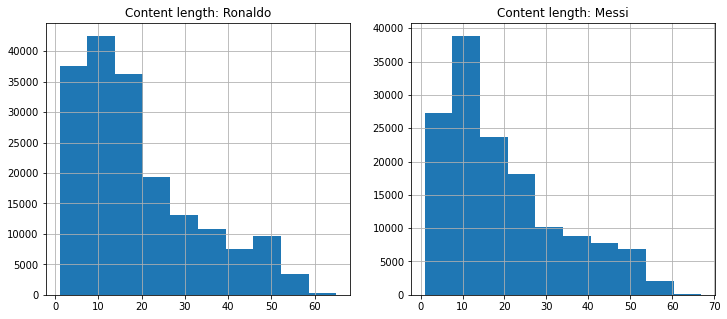

In [8]:
# Create the plot
plt.figure(figsize=(12,5))

# Ronaldo subplot (1 lines, 2 columns, first column)
plt.subplot(1,2,1)
# Assign each tweet to its length : convert to an array the calculate the length
dataset_ronaldo["content"].str.split().map(lambda tweet: len(tweet)).hist()
# Set the title 
plt.title("Content length: Ronaldo")

# Messi subplot (1 lines, 2 columns, first column)
plt.subplot(1,2,2)
# Assign each tweet to its length : convert to an array the calculate the length
dataset_messi["content"].str.split().map(lambda tweet: len(tweet)).hist()
# Set the title 
plt.title("Content length: Messi")

# Display the results 
plt.show()

## Most used words : Word Cloud ☁️

In [9]:
# Get all the positive tweets as a single corpus 
messi_positives_text = " ".join(tweet for tweet in messi_positives.content)
ronaldo_positives_text = " ".join(tweet for tweet in ronaldo_positives.content)
# Get all the negative tweets as a single corpus 
messi_negatives_text = " ".join(tweet for tweet in messi_negatives.content)
ronaldo_negatives_text = " ".join(tweet for tweet in ronaldo_negatives.content)

### Setup the wordcloud

Most important parameters : 

- **Mask :** an 8-bit image array which will decide the "shape" of the word cloud. We'll use the one in the input files. 
- **Stopwords :** a set of words that are filtered out of our analysis. The word cloud package already comes with the most usual stopwords. 

In [10]:
# Setup the mask 

# Load the image mask and convert to 8-bits (L = 8-bit pixels, black and white image)
mask = Image.open("../input/twitter-sentiment-analysis-and-word-embeddings/Visualization/cloud.png").convert("L")
# Create an array from the mask
mask = np.array(mask)
# Get the stopwords 
stopwords = set(STOPWORDS)

###### Create the wordclouds

Most important parameters : 
 - **Mask :** the one we've set right above
 - **Stopwords**
 - **Minimum word length :** Minimum number of letters a word must have to be included

In [11]:
# Negative tweets about Messi
wordcloud_messi_negatives = WordCloud(stopwords=stopwords,min_word_length=2,
                                      mask=mask,background_color="white", 
                                      contour_width=2, contour_color="black").generate_from_text(messi_negatives_text)
# Positive tweets about Messi
wordcloud_messi_positives = WordCloud(stopwords=stopwords,min_word_length=2,
                                      mask=mask,background_color="white", 
                                      contour_width=2, contour_color="black").generate_from_text(messi_positives_text)
# Negative tweets about Ronaldo
wordcloud_ronaldo_negatives = WordCloud(stopwords=stopwords,min_word_length=2,
                                      mask=mask,background_color="white", 
                                      contour_width=2, contour_color="black").generate_from_text(ronaldo_negatives_text)

# Positive tweets about Ronaldo
wordcloud_ronaldo_positives = WordCloud(stopwords=stopwords,min_word_length=2,
                                      mask=mask,background_color="white", 
                                      contour_width=2, contour_color="black").generate_from_text(ronaldo_positives_text)

In [12]:
# Set the figure titles
titles = ["Negative words used against Messi", "Positive words used towards Messi", 
          "Negative words used against Ronaldo", "Positive words used towards Ronaldo"]

# Set the wordclouds list
wordclouds = [wordcloud_messi_negatives, wordcloud_messi_positives, 
             wordcloud_ronaldo_negatives, wordcloud_ronaldo_positives]

### Results

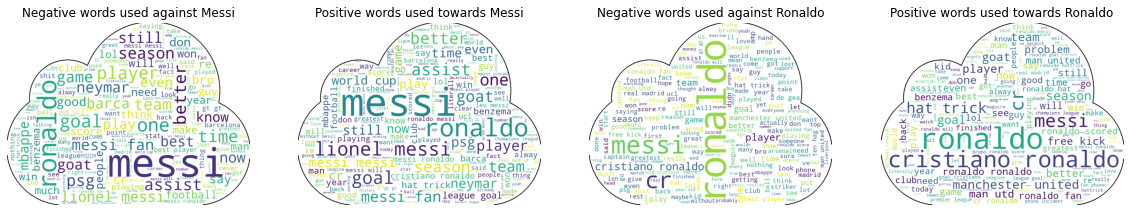

In [13]:
# Create the figure with 4 columns 
figure, axes = plt.subplots(nrows=1, ncols=4)
# Set the figure size
figure.set_size_inches(w=20, h=12)

# Loop through the axis and figures
for i in range(4):
    # Remove the axis (coordinates around the plot area)
    axes[i].axis("off")
    # Set the title accordingly
    axes[i].set_title(titles[i])
    # Show the corresponding wordcloud 
    axes[i].imshow(wordclouds[i])

## Engagements ❤️🔁

### Drop unncessary columns

In [14]:
stats_messi = dataset_messi.drop(columns=["tweet_id", "author_id", "content", "label", "lang", "prediction", "geo"])
stats_ronaldo = dataset_ronaldo.drop(columns=["tweet_id", "author_id", "content", "label", "lang", "prediction", "geo"])

stats_messi.head()

,date,source,retweet_count,like_count,quote_count
0,2022-04-27T09:33:09.000Z,Twitter for Android,0,0,0
1,2022-04-27T09:33:07.000Z,Twitter for Android,0,0,0
2,2022-04-27T09:33:04.000Z,Twitter Web App,0,0,0
3,2022-04-27T09:32:53.000Z,Twitter for Android,0,0,0
4,2022-04-27T09:32:48.000Z,Twitter for Android,0,0,0


 ### Convert the dates to a more convenient datetime format (yy-mm-dd)

In [15]:
# Convert to a date time object then format 
stats_messi["date"] = pd.to_datetime(stats_messi.date).dt.strftime("%y-%m-%d")
stats_ronaldo["date"] = pd.to_datetime(stats_ronaldo.date).dt.strftime("%y-%m-%d")
# Display some results
stats_messi.head()

,date,source,retweet_count,like_count,quote_count
0,22-04-27,Twitter for Android,0,0,0
1,22-04-27,Twitter for Android,0,0,0
2,22-04-27,Twitter Web App,0,0,0
3,22-04-27,Twitter for Android,0,0,0
4,22-04-27,Twitter for Android,0,0,0


### Engagements by day : Messi

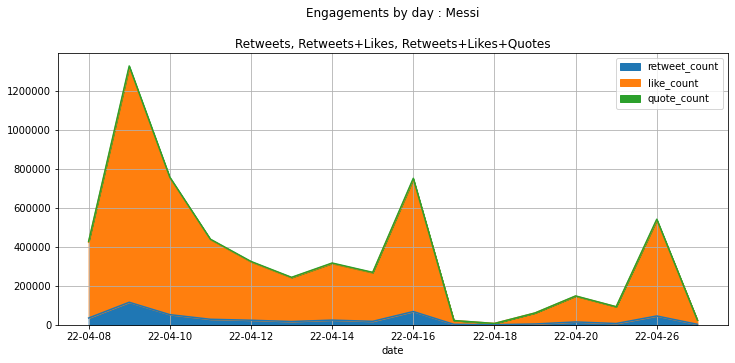

In [16]:
# Plot stats by day
figure = stats_messi.groupby(by="date").sum().plot(
        kind="area", 
        figsize=(12,5), 
        title="Engagements by day : Messi\n\nRetweets, Retweets+Likes, Retweets+Likes+Quotes",
        grid=True
)
# Prevent matplotlib from showing exponential axis values (1e6, 1e5...)
plt.ticklabel_format(style="plain", axis="y")
# Display the stats
plt.show()

### Engagements by day : Ronaldo

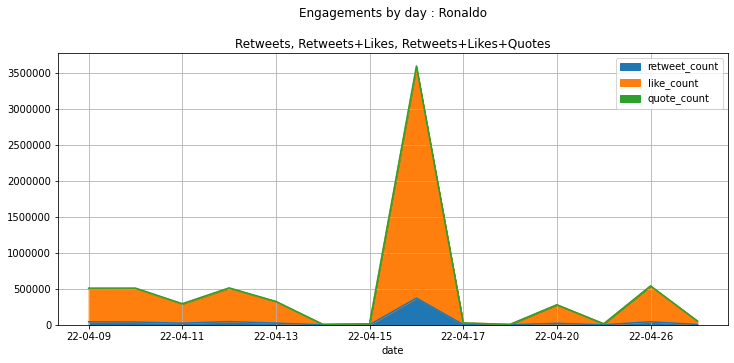

In [17]:
# Plot stats by day
figure = stats_ronaldo.groupby(by="date").sum().plot(
        kind="area", 
        figsize=(12,5), 
        title="Engagements by day : Ronaldo\n\nRetweets, Retweets+Likes, Retweets+Likes+Quotes",
        grid=True, 
        stacked=True
)
# Prevent matplotlib from showing exponential axis values (1e6, 1e5...)
plt.ticklabel_format(style="plain", axis="y")
# Display the stats
plt.show()

## Data by country 🌍

In [18]:
# Drop null locations 
messi = dataset_messi.dropna(subset=["geo"])
ronaldo = dataset_ronaldo.dropna(subset=["geo"])
# Get the subsets containing contents with countries available 
messi_with_countries = messi[messi["geo"]!="-1"]
ronaldo_with_countries = ronaldo[ronaldo["geo"]!="-1"]
# Display some results 
ronaldo_with_countries.head(3)

,tweet_id,author_id,content,lang,date,source,geo,retweet_count,like_count,quote_count,prediction,label
257,1519240790261874688,887094709692366855,messi fans are worse than cr fans,en,2022-04-27T09:03:25.000Z,Twitter for Android,United Kingdom,0.0,0.0,0.0,0.535113,Negative
335,1519238690836725760,3176572681,benzema already on a goal scoring run at ucl n...,en,2022-04-27T08:55:04.000Z,Twitter for iPhone,India,0.0,1.0,0.0,0.584629,Negative
1507,1519202978334400513,1490962160603836424,good day red devils chelsea next at old traffo...,en,2022-04-27T06:33:10.000Z,Twitter for Android,South Africa,0.0,0.0,0.0,0.673689,Positive


In [19]:
# Get the top countries
top_countries_messi = messi_with_countries.geo.value_counts().to_dict()
top_countries_ronaldo = ronaldo_with_countries.geo.value_counts().to_dict()

### Top countries : Messi 

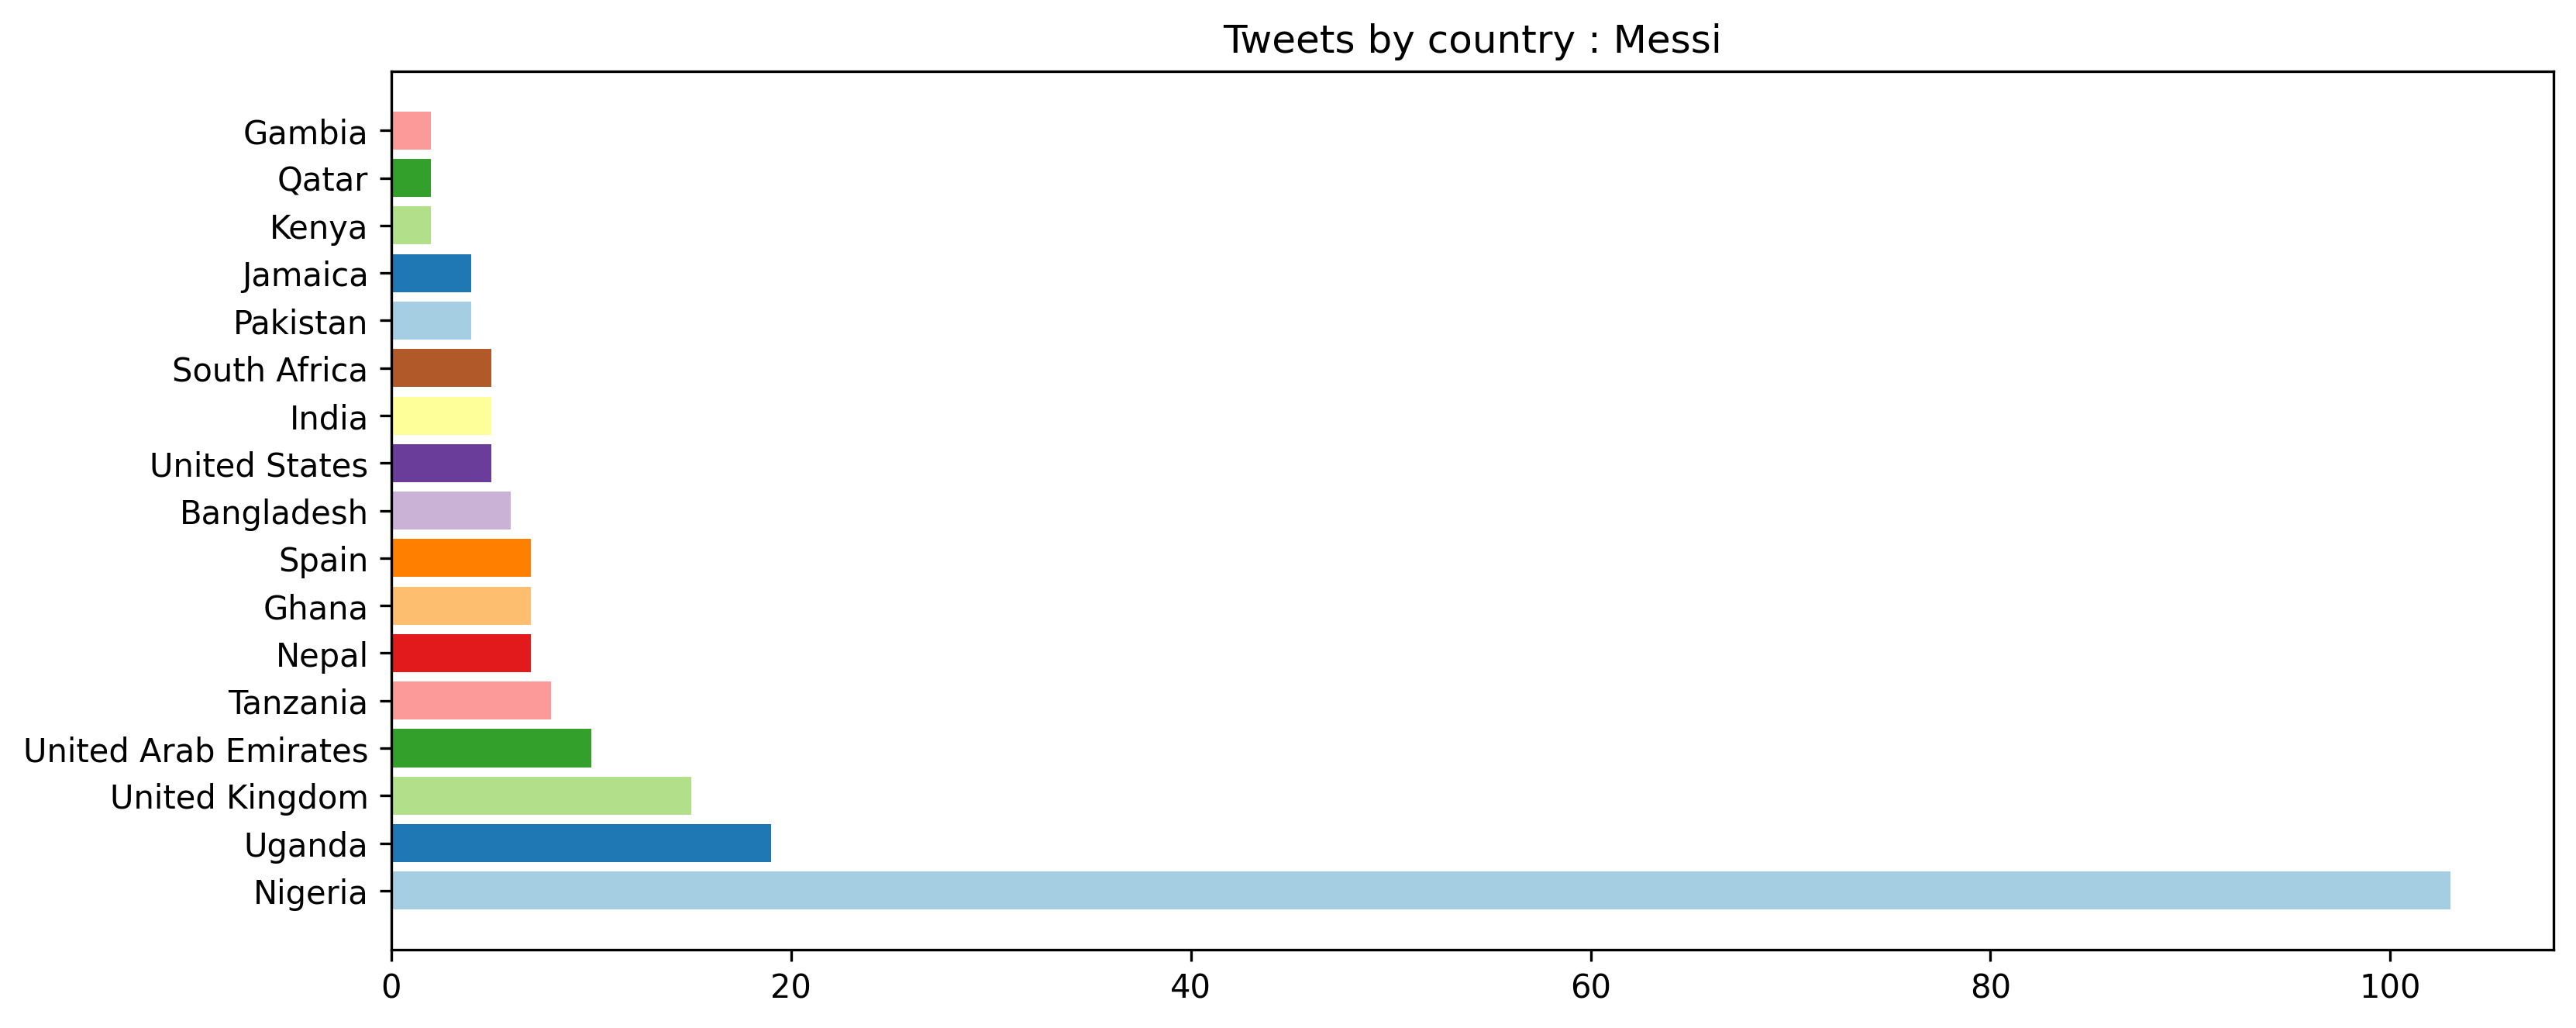

In [20]:
# Get the data
keys_messi = list(top_countries_messi.keys())
values_messi = list(top_countries_messi.values())

# Get the color map
color_map = plt.get_cmap("Paired")

# Setup the figure
plt.figure(figsize=(12,5), dpi=300)
# Set the title 
plt.title("Tweets by country : Messi")
# Setup the plot
plt.barh(keys_messi, values_messi, color=color_map.colors)
# Display results
plt.show()

### Top countries : Ronaldo

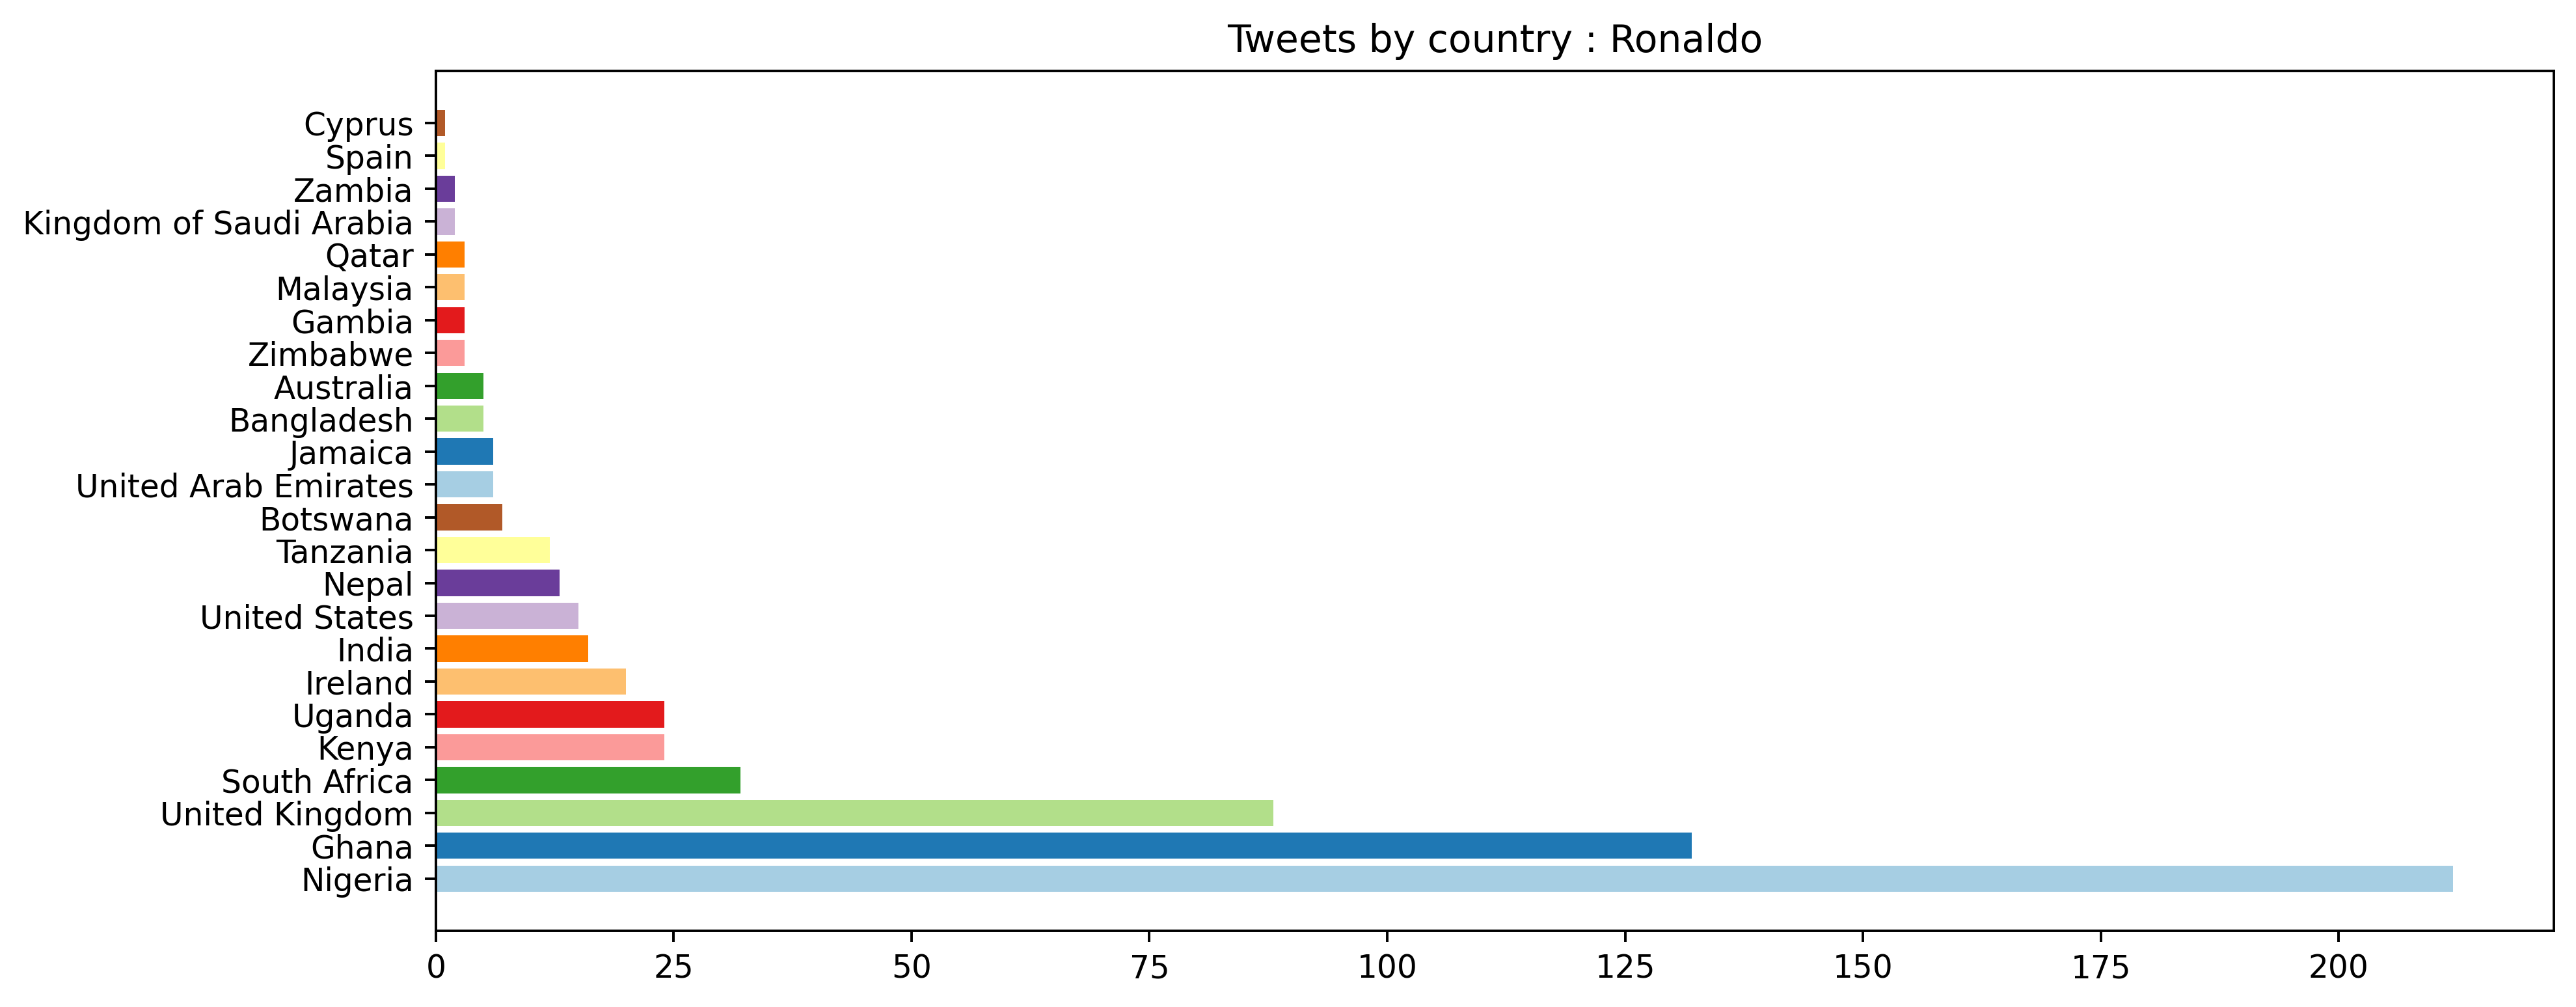

In [21]:
# Get the data
keys_ronaldo = list(top_countries_ronaldo.keys())
values_ronaldo = list(top_countries_ronaldo.values())

# Get the color map
color_map = plt.get_cmap("Paired")

# Setup the figure
plt.figure(figsize=(12,5), dpi=350)
# Set the title 
plt.title("Tweets by country : Ronaldo")
# Setup the plot
plt.barh(keys_ronaldo, values_ronaldo, color=color_map.colors)
# Display results
plt.show()

## Most popular sources 💻📱🖥

In [22]:
# Get the top sources
top_sources_messi = dataset_messi.source.value_counts().to_dict()
top_sources_ronaldo = dataset_ronaldo.source.value_counts().to_dict()

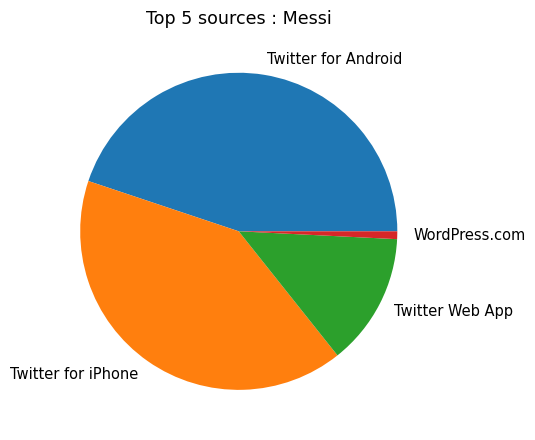

In [23]:
# Get the data
keys_messi = list(top_sources_messi.keys())
values_messi = list(top_sources_messi.values())

# Get the color map
color_map = plt.get_cmap("Paired")

# Setup the figure
plt.figure(figsize=(12,5), dpi=105)
# Set the title 
plt.title("Top 5 sources : Messi")
# Setup the plot
plt.pie(
    values_messi[0:4], 
    labels=keys_messi[0:4]
)
# Display results
plt.show()

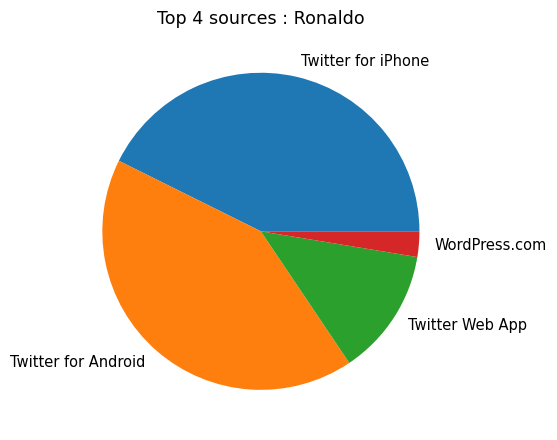

In [24]:
# Get the data
keys_ronaldo = list(top_sources_ronaldo.keys())
values_ronaldo = list(top_sources_ronaldo.values())

# Get the color map
color_map = plt.get_cmap("Paired")

# Setup the figure
plt.figure(figsize=(12,5), dpi=105)
# Set the title 
plt.title("Top 4 sources : Ronaldo")
# Setup the plot
plt.pie(
    values_ronaldo[0:4], 
    labels=keys_ronaldo[0:4]
)
# Display results
plt.show()

# Thank you for your time 😄